In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import statsmodels.api as sm
import folium
from folium.plugins import MarkerCluster
from scipy.stats import norm

# the below extension properly formats a cell after it is run
%load_ext nb_black 

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)
import pandas as pd

# Set the maximum number of columns to 200
pd.set_option('display.max_columns', 200)



The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [93]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

<IPython.core.display.Javascript object>

In [94]:
housing_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2579 non-null   int64  
 1   GrLivArea      2579 non-null   int64  
 2   SalePrice      2579 non-null   int64  
 3   MSSubClass     2579 non-null   int64  
 4   MSZoning       2579 non-null   object 
 5   LotFrontage    2579 non-null   float64
 6   LotArea        2579 non-null   int64  
 7   Street         2579 non-null   object 
 8   Alley          2579 non-null   object 
 9   LotShape       2579 non-null   object 
 10  LandContour    2579 non-null   object 
 11  Utilities      2579 non-null   object 
 12  LotConfig      2579 non-null   object 
 13  LandSlope      2579 non-null   object 
 14  Neighborhood   2579 non-null   object 
 15  Condition1     2579 non-null   object 
 16  Condition2     2579 non-null   object 
 17  BldgType       2579 non-null   object 
 18  HouseSty

<IPython.core.display.Javascript object>

In [95]:
# Some key takeaways from running the below:
# SalePrice has a mean value of approximately 178,011 and a standard deviation of approximately 75,042.
# The YearBuilt column has a minimum value of 1872 and a maximum value of 2010, indicating that the
#     houses in the dataset were built over a wide range of years.
# The GrLivArea column has a mean value of approximately 1,486 square feet and a standard deviation
#     of approximately 489 square feet, indicating that there is a wide range in the sizes of the living
#     areas in the houses in the dataset.
# The OverallQual column has a mean value of approximately 6, indicating that most of the houses in the
#     dataset are rated as having an above average overall quality.
# The GarageCars column has a mean value of approximately 1.75, indicating that most of the houses in
#     the dataset have a 1-2 car garage.
# The TotRmsAbvGrd column has a mean value of approximately 6, indicating that most of the houses in
#     the dataset have between 5-7 rooms above ground.
# The Fireplaces column has a mean value of approximately 0.6, indicating that most of the houses in
#     the dataset have at least one fireplace.

housing_no_na.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.579000e+03,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.00000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000
mean,7.147546e+08,1485.950368,178053.442420,57.694843,68.511600,10119.269484,6.04653,5.618457,1970.325708,1983.765025,98.807677,444.112834,53.238852,538.985653,1036.337340,1144.982939,336.721210,4.246219,0.435052,0.062040,1.550989,0.378054,2.850717,1.040326,6.386972,0.604110,1878.799922,1.747189,466.683598,95.956960,46.103141,23.223342,2.512214,16.162854,1.662660,48.750291,6.152385,2007.839085
std,1.886603e+08,488.723768,75044.983207,42.810137,20.692351,8128.389882,1.36770,1.122200,29.719469,20.483428,175.569308,429.412852,174.423920,425.305881,419.044454,376.031658,424.124904,44.412136,0.518798,0.244468,0.545823,0.499184,0.822852,0.202588,1.535436,0.648683,430.337599,0.739332,207.677396,129.063212,66.067238,64.118627,25.298791,56.803807,30.345262,498.820852,2.669913,1.312088
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.00000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129950.000000,20.000000,60.000000,7406.500000,5.00000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,214.500000,791.500000,871.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354542e+08,1436.000000,159900.000000,50.000000,68.516053,9382.000000,6.00000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1070.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,474.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071806e+08,1733.000000,209750.000000,70.000000,78.000000,11485.500000,7.00000,6.000000,1999.000000,2003.000000,157.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1999.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


<IPython.core.display.Javascript object>

In [96]:
# looks like the recession had little effect on the housing market in Ames besides a slight dip in one bedrooms
for i in range(1, 4):
    col_name = f"BedroomAbvGr_{i}"
    filtered_data = housing_no_na.loc[
        housing_no_na["BedroomAbvGr"] == i, ["SalePrice", "YrSold"]
    ]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby("YrSold").mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")

Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    154153.210526
2007    194558.545455
2008    183832.608696
2009    145482.954545
2010    210285.538462

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    161245.957447
2007    163278.801370
2008    159636.507143
2009    161337.039735
2010    149820.532468

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172503.700758
2007    173535.258160
2008    176496.166102
2009    187377.858824
2010    173079.271676



<IPython.core.display.Javascript object>

Summary Statistics of Sale Price:
count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64


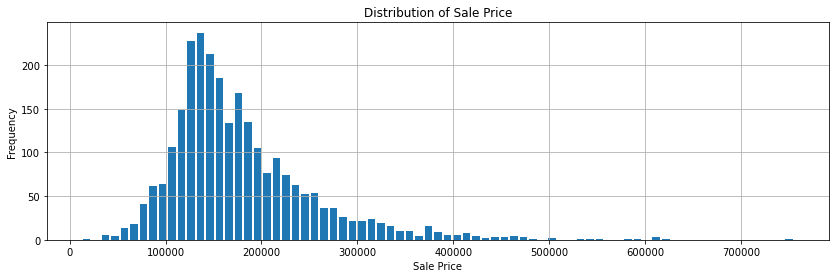

<IPython.core.display.Javascript object>

In [97]:
# Looking at the sale price. Skewed to the left with a long right taill and an outlier of a sale price over 700k

# Calculate the summary statistics of sales price
sales_price_stats = housing_no_na["SalePrice"].describe()

# Print the summary statistics of sales price
print("Summary Statistics of Sale Price:")
print(sales_price_stats)

# Plot the histogram of sales price
housing_no_na["SalePrice"].hist(bins=75, rwidth=0.8, figsize=(14, 4))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

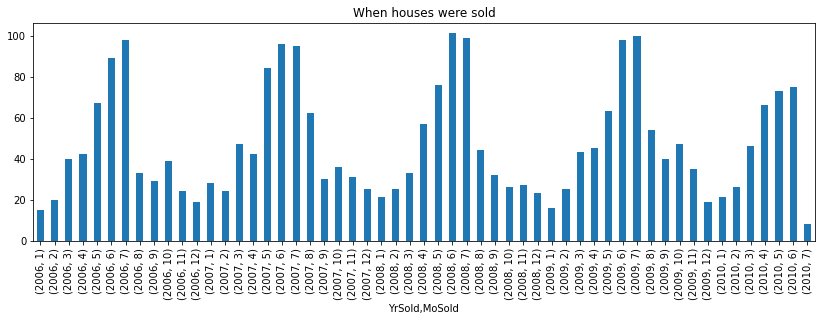

<IPython.core.display.Javascript object>

In [98]:
# Plot the number of houses sold by year and month
# Definitely looks like there is seasonality which would have to be looked into further.
housing_no_na.groupby(["YrSold", "MoSold"]).PID.count().plot(
    kind="bar", figsize=(14, 4)
)
plt.title("When houses were sold")
plt.show()

Summary Statistics of GrLivArea:
count    2579.000000
mean     1485.950368
std       488.723768
min       334.000000
25%      1112.000000
50%      1436.000000
75%      1733.000000
max      4676.000000
Name: GrLivArea, dtype: float64


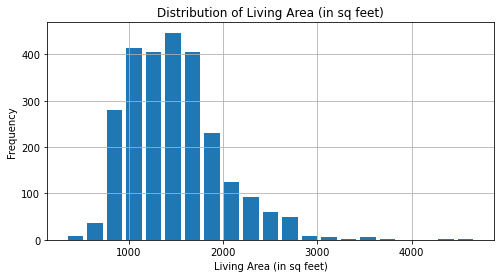

<IPython.core.display.Javascript object>

In [99]:
# looking at the size of the houses sold.  Distribution has a long right tail
# Calculate the summary statistics of GrLivArea
gr_liv_area_stats = housing_no_na["GrLivArea"].describe()

# Print the summary statistics of GrLivArea
print("Summary Statistics of GrLivArea:")
print(gr_liv_area_stats)

# Plot the histogram of GrLivArea
housing_no_na["GrLivArea"].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Distribution of Living Area (in sq feet)')
plt.xlabel('Living Area (in sq feet)')
plt.ylabel('Frequency')
plt.show()


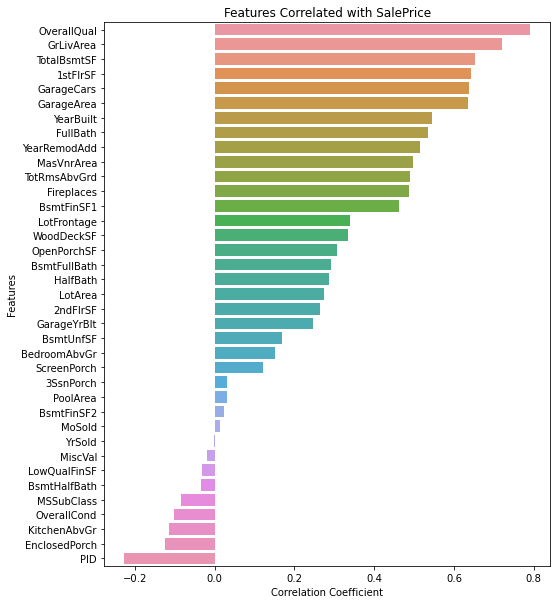

<IPython.core.display.Javascript object>

In [100]:
# strong correlation with a few features. Looks like SF might be better to combine in to total SF

# Calculate the correlation matrix
corr = housing_no_na.corr()

# Sort the features by correlation to SalePrice from positive to negative
corr_sorted = corr.sort_values("SalePrice", ascending=False)

# Plot the features sorted by correlation to SalePrice
plt.figure(figsize=(8, 10))
sns.barplot(x=corr_sorted["SalePrice"][1:], y=corr_sorted.index[1:], orient="h")
plt.title("Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

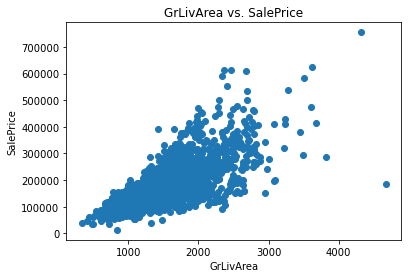

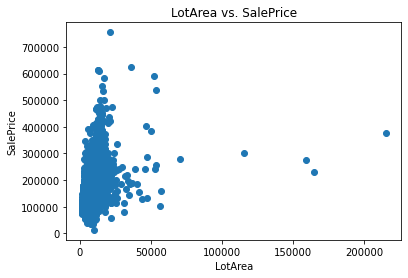

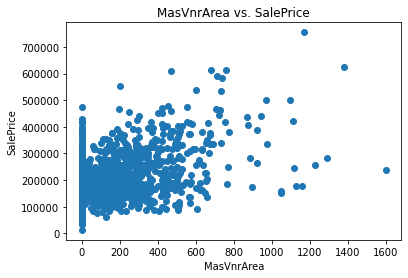

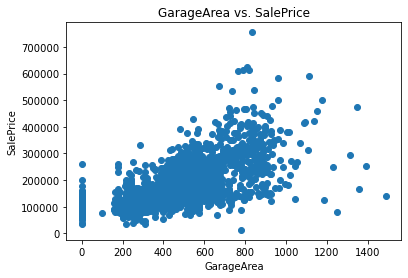

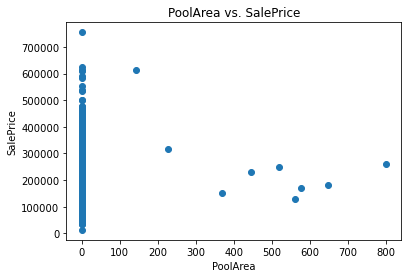

<IPython.core.display.Javascript object>

In [101]:
# taking a look at how the Area features relate to SalePrice

for column in housing_no_na.columns:
    if "Area" in column:
        plt.scatter(housing_no_na[column], housing_no_na["SalePrice"])
        plt.title(f"{column} vs. SalePrice")
        plt.xlabel(column)
        plt.ylabel("SalePrice")
        plt.show()


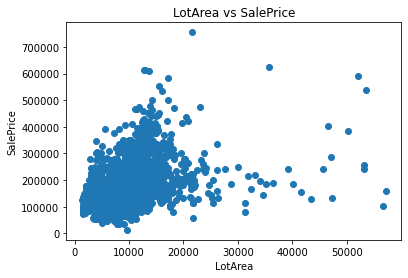

<IPython.core.display.Javascript object>

In [102]:
# after removing outliers it seems that lot area has less of an effect than expected

# Filter the DataFrame to remove the outliers
df_filtered = housing_no_na[housing_no_na['LotArea'] <= 60000]

# Plot the scatterplot of LotArea vs SalePrice
plt.scatter(df_filtered['LotArea'], df_filtered['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


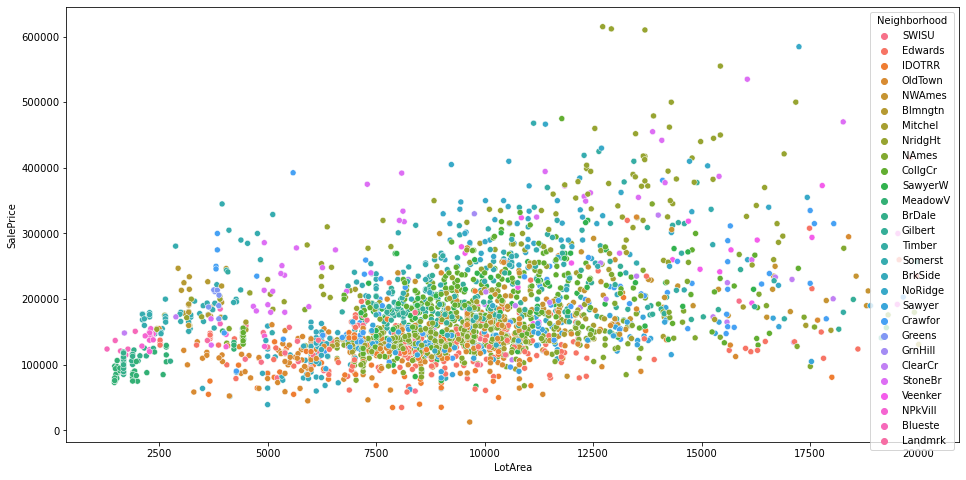

<IPython.core.display.Javascript object>

In [103]:
# when factoring in the neighborhood it looks like there is more of a relationship with lot area and sale price

# Filter out outliers with LotArea above 20000 to zoom in on the gaph
filtered = housing_no_na[housing_no_na['LotArea'] <= 20000]

# Create a scatterplot of LotArea vs SalePrice, colored by Neighborhood
plt.figure(figsize=(16, 8))
sns.scatterplot(data=filtered, x='LotArea', y='SalePrice', hue='Neighborhood')
plt.show()


In [104]:
# Taking a closer look at the neighborhoods.  There is a large rannge of house values in 
# each neighborhood so neighborhood might not be that great of a predictor of sale price

neighborhood_stats = housing_no_na.groupby('Neighborhood')['SalePrice'].agg(['count', 'max', 'min', 'mean', 'std']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_stats.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max     min      mean       std
Neighborhood                                           
NoRidge          67  755000  190000  326114.0   90450.0
NridgHt         121  615000  154000  313662.0   98326.0
StoneBr          43  591587  130000  305308.0  109767.0
GrnHill           2  330000  230000  280000.0   70711.0
Veenker          23  385000  150000  251263.0   65297.0
Timber           54  425000  150000  242910.0   71492.0
Somerst         143  468000  139000  228762.0   57421.0
ClearCr          40  328000  107500  213981.0   50286.0
Crawfor          92  392500   90350  202076.0   60450.0
CollgCr         236  475000  110000  198133.0   49863.0
Blmngtn          23  246990  159895  196237.0   26925.0
Greens            8  214000  155000  193531.0   21999.0
NWAmes          123  306000   82500  190372.0   37731.0
Gilbert         143  377500  115000  189440.0   31500.0
SawyerW         113  320000   67500  188102.0   48383.0
Mitchel         10

<IPython.core.display.Javascript object>

In [105]:
# checking for highly inbalanced distributions
for col in housing_no_na.columns:
    value_counts = housing_no_na[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.31%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%
Column MiscVal has highest frequency of 96.32%


<IPython.core.display.Javascript object>

In [106]:
# checking for correlation among the variables with highly inbalanced distributions
high_freq_cols = [
    "Street",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "Heating",
    "LowQualFinSF",
    "KitchenAbvGr",
    "3SsnPorch",
    "PoolArea",
    "PoolQC",
    "MiscFeature",
    "MiscVal",
]

# create a subset of the housing_no_na dataframe with only the selected columns
subset = housing_no_na[high_freq_cols]

# create a correlation matrix
corr_matrix = subset.corr()

# display the correlation matrix
print(corr_matrix)

              LowQualFinSF  KitchenAbvGr  3SsnPorch  PoolArea   MiscVal
LowQualFinSF      1.000000     -0.014383  -0.002538 -0.005241 -0.005187
KitchenAbvGr     -0.014383      1.000000  -0.019774 -0.010911  0.040081
3SsnPorch        -0.002538     -0.019774   1.000000 -0.005443  0.001148
PoolArea         -0.005241     -0.010911  -0.005443  1.000000  0.021243
MiscVal          -0.005187      0.040081   0.001148  0.021243  1.000000


<IPython.core.display.Javascript object>

In [107]:
housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
].dtypes

Street          object
Utilities       object
LandSlope       object
Condition2      object
RoofMatl        object
Heating         object
LowQualFinSF     int64
KitchenAbvGr     int64
3SsnPorch        int64
PoolArea         int64
PoolQC          object
MiscFeature     object
MiscVal          int64
dtype: object

<IPython.core.display.Javascript object>

In [108]:
# define the independent and dependent variables
X = housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
]
y = housing_no_na["SalePrice"]

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.094
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           4.13e-32
Time:                        12:26:45   Log-Likelihood:                -32490.
No. Observations:                2579   AIC:                         6.505e+04
Df Residuals:                    2543   BIC:                         6.526e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               8.52e+04   4.19e+0

<IPython.core.display.Javascript object>

In [109]:
# It appears that only a few of the features have a statistically significant relationship with the SalePrice. 
# These features have a p-value less than 0.05 and indicate that there is a high likelihood that 
# the coefficient is not equal to zero. These features are: Street, Utilities, LandSlope, Condition2,
# RoofMatl, Heating, PoolQC, and KitchenAbvGr. 

# I am going to drop the columns with no relationship with the sale price and highly imbalanced distributions. 

columns_to_drop = ["PoolArea", "MiscFeature", "LowQualFinSF"]
housing_cleaned = housing_no_na.drop(columns_to_drop, axis=1)

# since i removed the misc house features Im also going to remove the value of these items
housing_cleaned['SalePrice'] = housing_cleaned['SalePrice'] - housing_cleaned['MiscVal']

# and will now remove the MiscVal column
housing_cleaned.drop('MiscVal', axis=1, inplace=True)


<IPython.core.display.Javascript object>

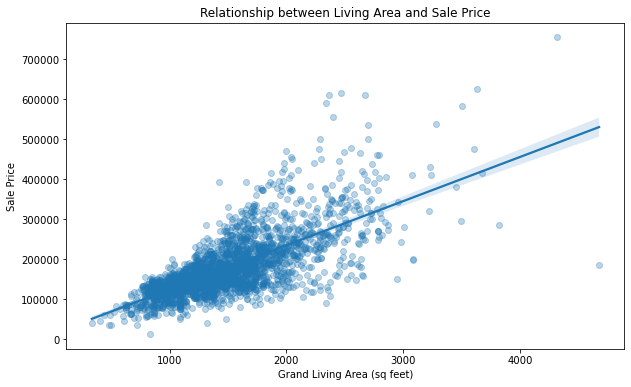

<IPython.core.display.Javascript object>

In [110]:
# Looking at outliers

# Plot the regression between GrLivArea and SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(
    x=housing_cleaned["GrLivArea"],
    y=housing_cleaned["SalePrice"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relationship between Living Area and Sale Price")
plt.xlabel("Grand Living Area (sq feet)")
plt.ylabel("Sale Price")
plt.show()

In [111]:
housing_cleaned[housing_cleaned["GrLivArea"] > 4000]



,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
309,908154205,4676,184750,60,RL,130.0,40094,Pave,No_Alley,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,No_Pool,No_Fence,10,2007,New,Partial
1007,528351010,4316,755000,60,RL,104.0,21535,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,No_Pool,No_Fence,1,2007,WD,Normal


<IPython.core.display.Javascript object>

In [112]:
# dropping the two outliers with observations with GrLivArea > 4000

housing_cleaned = housing_cleaned[housing_cleaned["GrLivArea"] <= 4000]


<IPython.core.display.Javascript object>

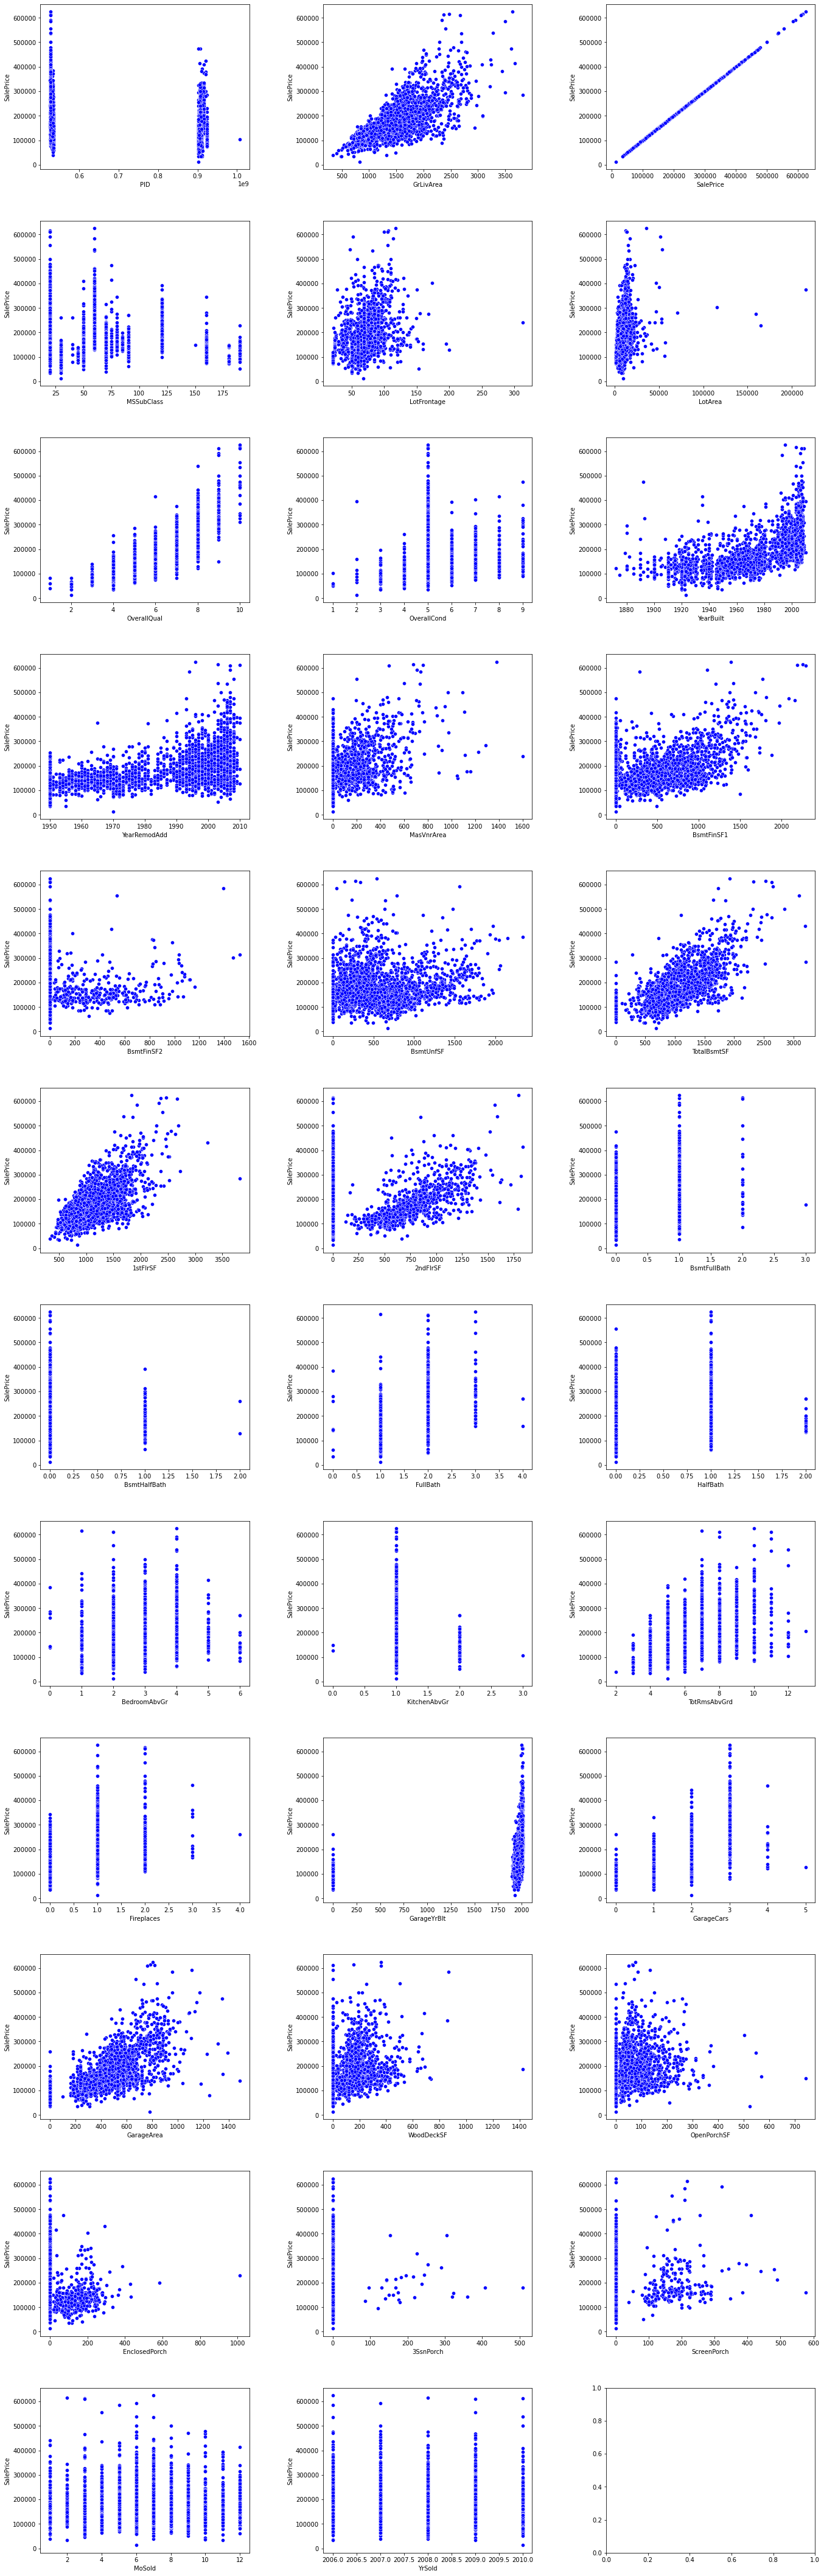

<IPython.core.display.Javascript object>

In [113]:
# creating function to plot numeric features against sale price
# Looking at the scatterplots there seems to be a linear relationship with GrLivArea, OverallQual, TotalBsmtSF,
# 1stFlrSF, maybe Fireplaces, maybe GarageCars and GarageArea


def plot_numeric_features(
    housing_cleaned, numeric_features, ncols=3, height=5, width=15
):
    nrows = int(np.ceil(len(numeric_features) / ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height * nrows))
    ax = ax.flatten()

    for i, col in enumerate(numeric_features):
        sns.scatterplot(
            data=housing_cleaned, x=col, y="SalePrice", color="blue", ax=ax[i]
        )
        ax[i].set_xlabel(col)

    fig.tight_layout(pad=5.0)
    plt.show()


# Separate numerical features
num_cols = housing_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
# plotting numeric features with function
plot_numeric_features(housing_cleaned, num_cols, width=20)

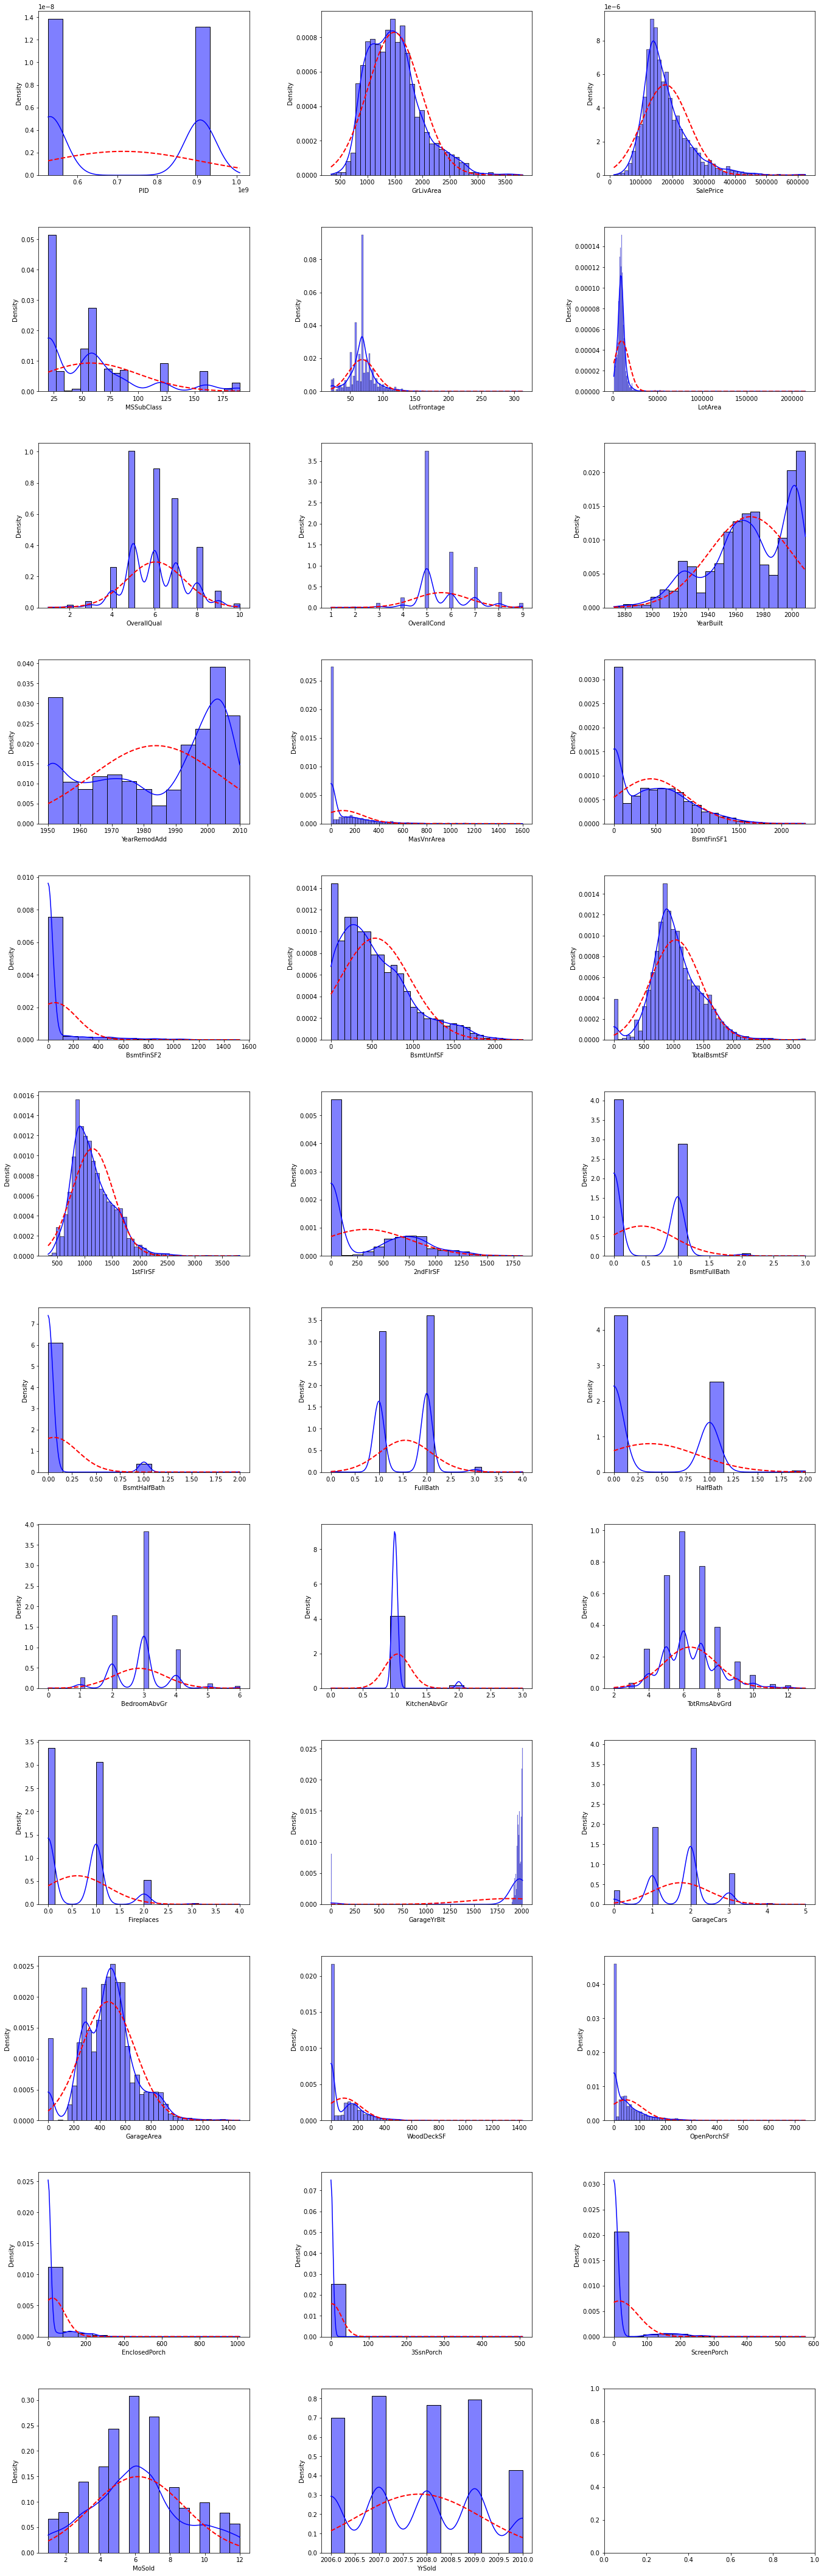

<IPython.core.display.Javascript object>

In [114]:
# looking at the ditribution of the data.  Blue line is current ditribution and dotted red represents
# the normal distribution of the data


def plot_numeric_distribution(
    housing_cleaned, numeric_features, ncols=3, height=5, width=15
):
    nrows = int(np.ceil(len(numeric_features) / ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height * nrows))
    ax = ax.flatten()

    for i, col in enumerate(numeric_features):
        sns.histplot(
            data=housing_cleaned,
            x=col,
            kde=True,
            color="blue",
            ax=ax[i],
            stat="density",
        )
        ax[i].set_xlabel(col)

        # Overlay normal distribution curve
        mean, std = norm.fit(housing_cleaned[col])
        x = np.linspace(housing_cleaned[col].min(), housing_cleaned[col].max(), 100)
        y = norm.pdf(x, mean, std)
        ax[i].plot(x, y, "r--", linewidth=2)

    fig.tight_layout(pad=5.0)
    plt.show()


# Creating plots
plot_numeric_distribution(housing_cleaned, num_cols, width=20)

In [115]:
housing_no_na.isna().sum()

PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr

<IPython.core.display.Javascript object>

In [116]:
# looking at correlation with sale price

corr_matrix = housing_cleaned.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.793693
GrLivArea        0.721326
TotalBsmtSF      0.654435
1stFlrSF         0.644480
GarageCars       0.641810
GarageArea       0.637707
YearBuilt        0.548807
FullBath         0.534837
YearRemodAdd     0.519235
MasVnrArea       0.490781
TotRmsAbvGrd     0.489953
Fireplaces       0.487864
BsmtFinSF1       0.461111
LotFrontage      0.337675
WoodDeckSF       0.330682
OpenPorchSF      0.311472
BsmtFullBath     0.296977
HalfBath         0.285405
LotArea          0.273774
2ndFlrSF         0.256156
GarageYrBlt      0.248271
BsmtUnfSF        0.167030
BedroomAbvGr     0.149407
ScreenPorch      0.123640
3SsnPorch        0.031925
BsmtFinSF2       0.023915
MoSold           0.018726
YrSold           0.000548
BsmtHalfBath    -0.045842
MSSubClass      -0.085530
OverallCond     -0.103611
KitchenAbvGr    -0.114938
EnclosedPorch   -0.123629
PID             -0.226011
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>

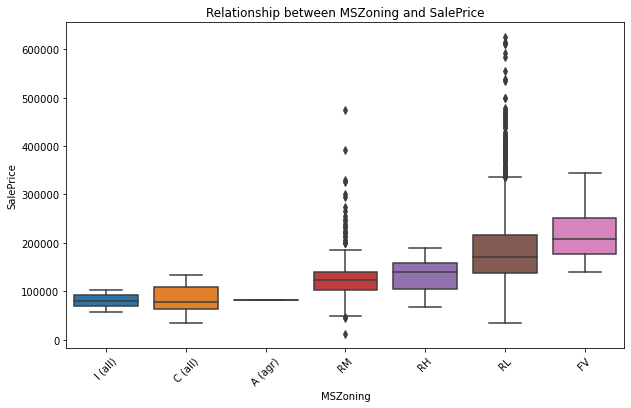

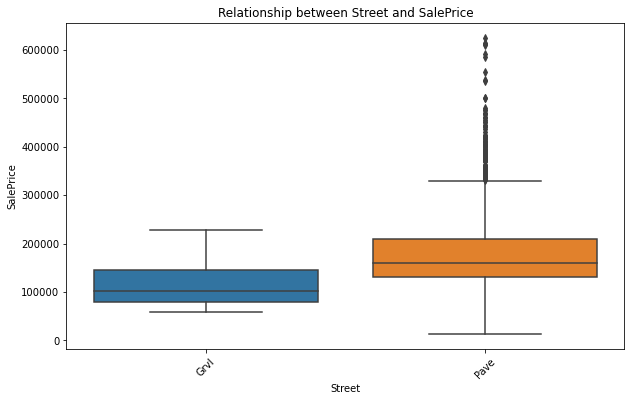

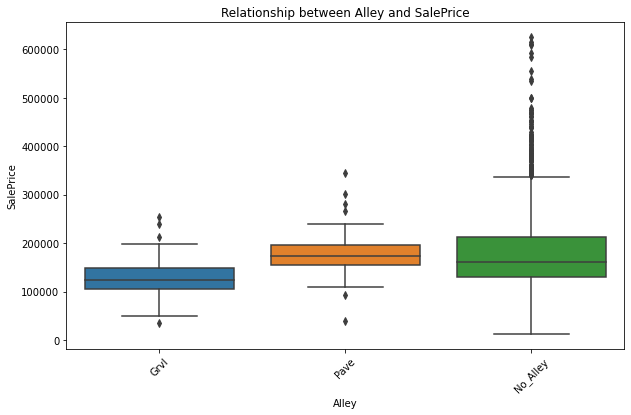

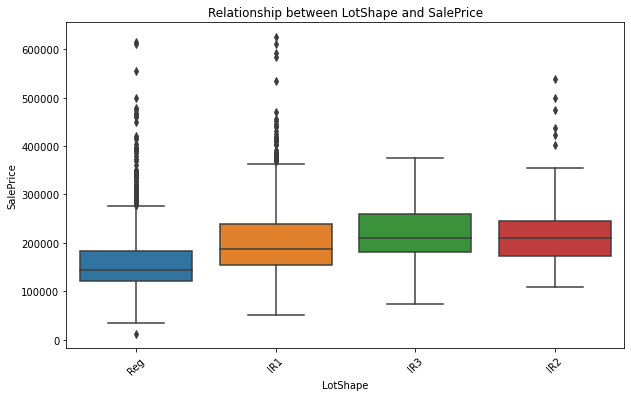

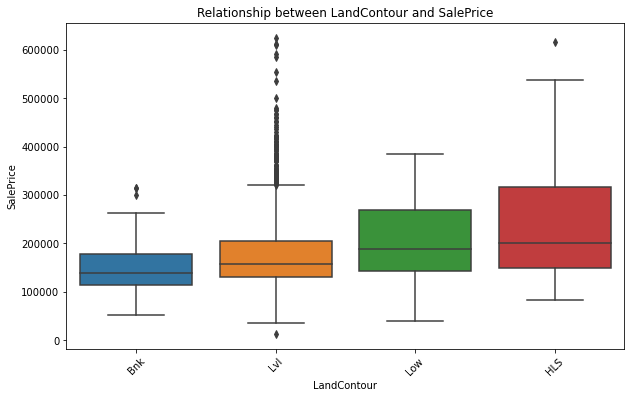

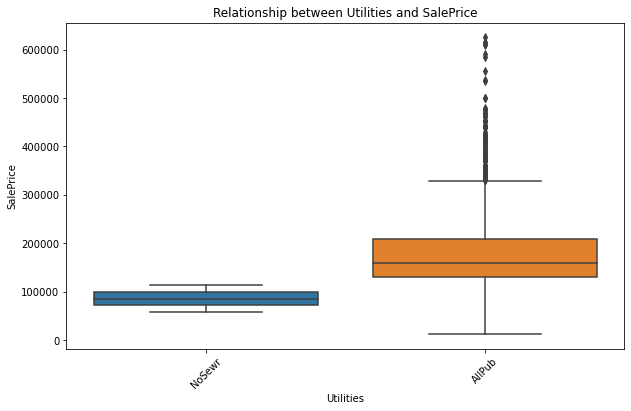

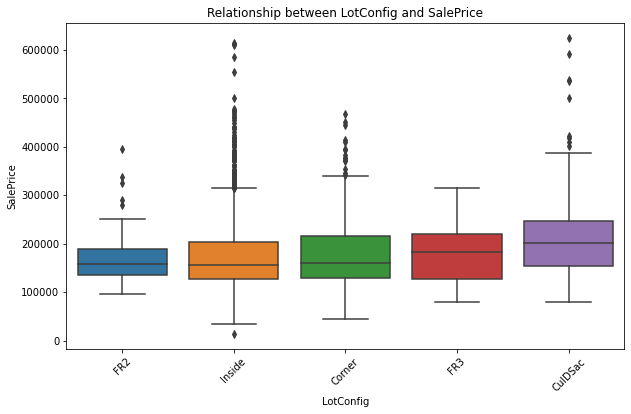

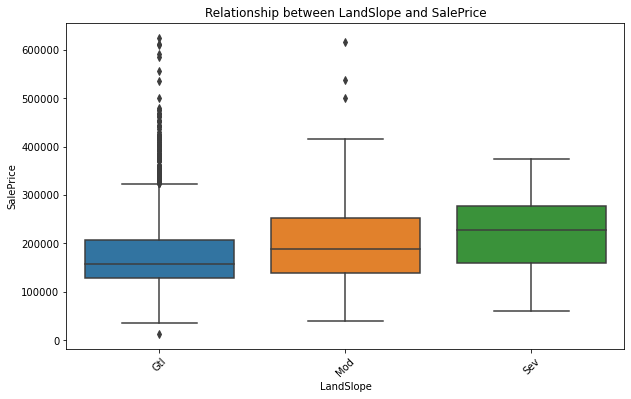

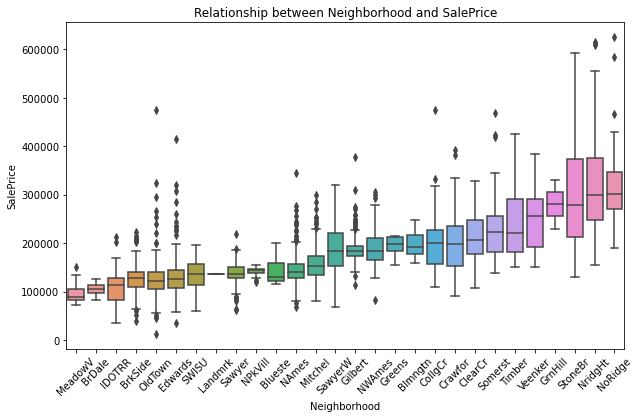

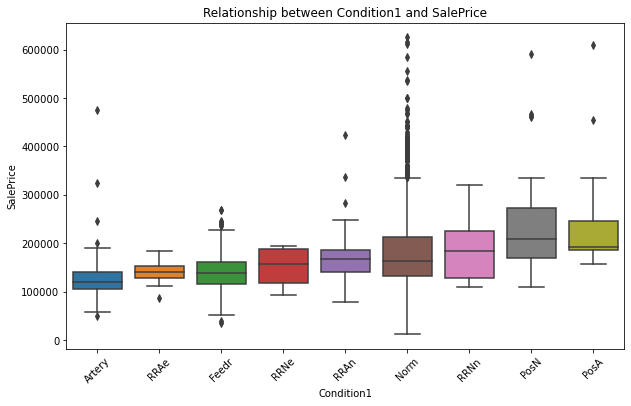

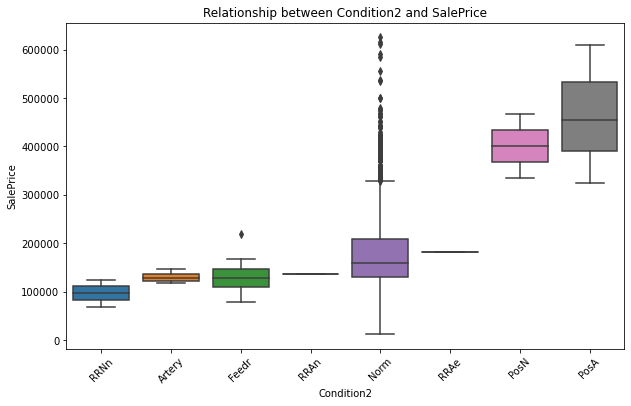

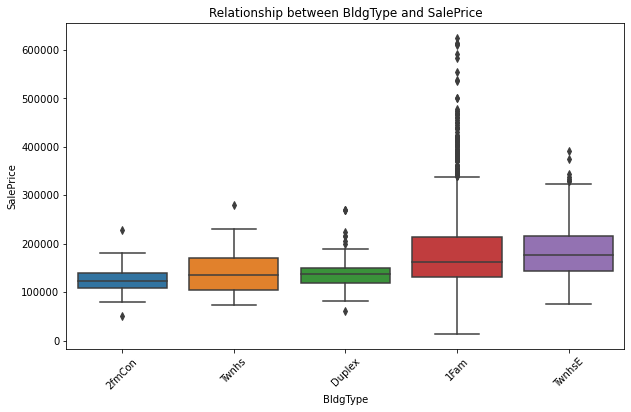

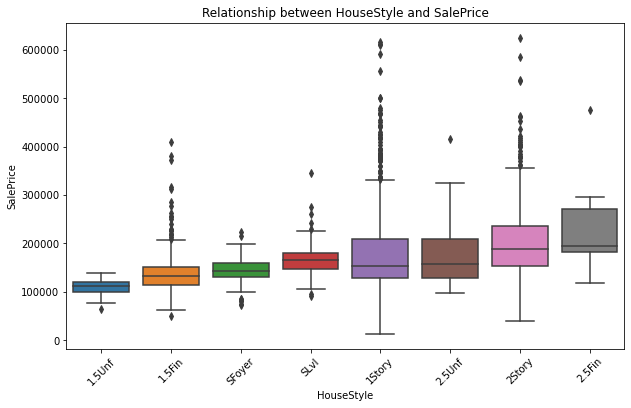

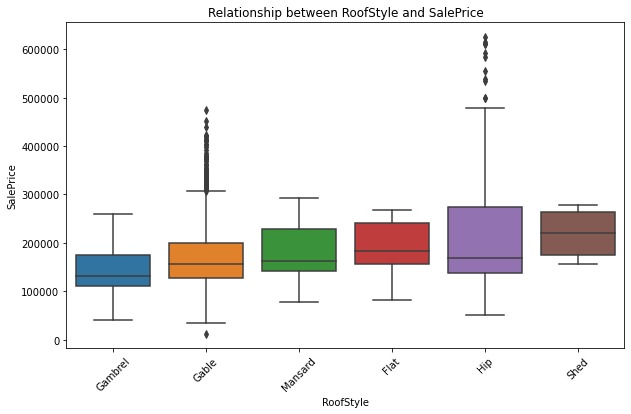

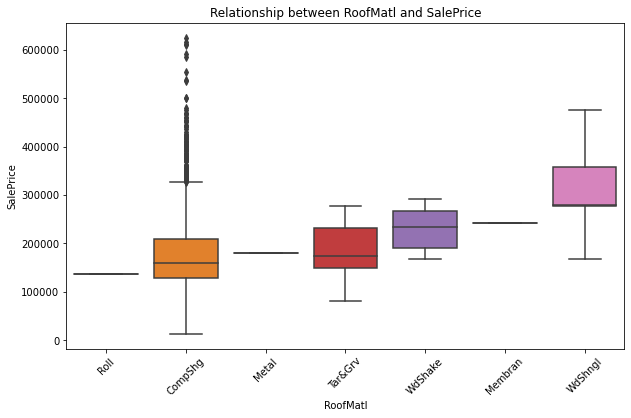

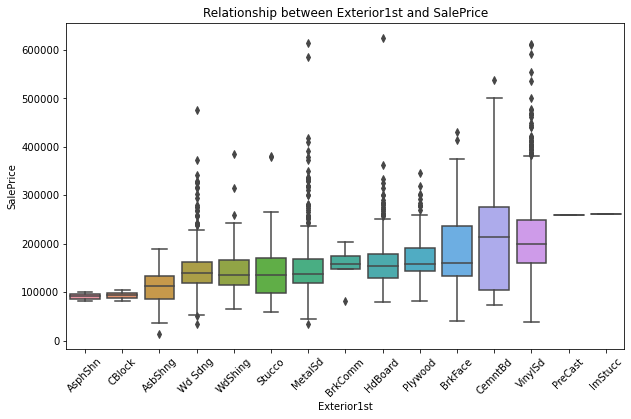

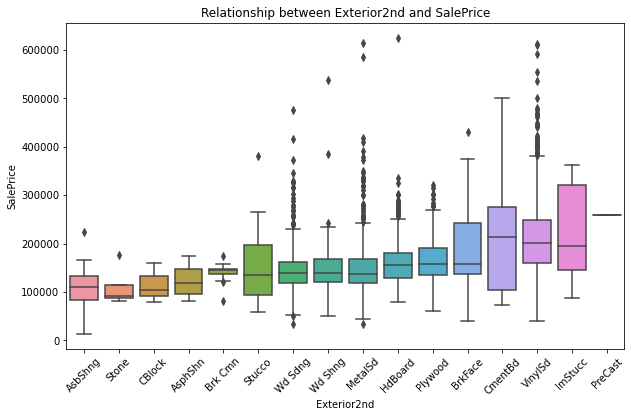

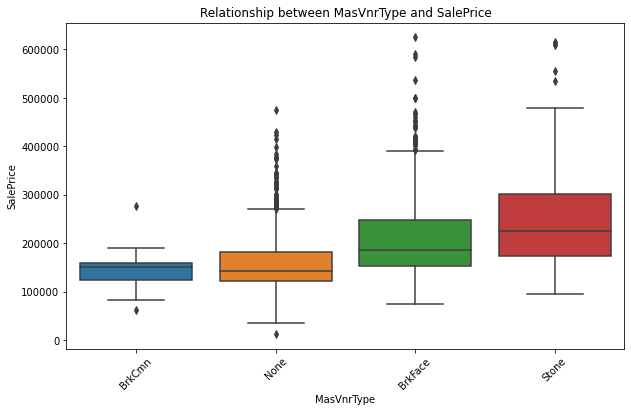

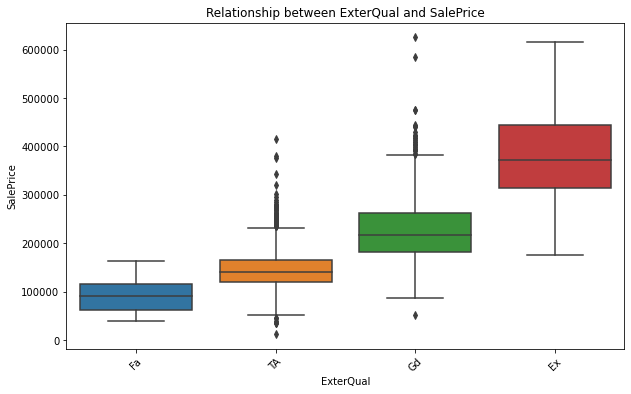

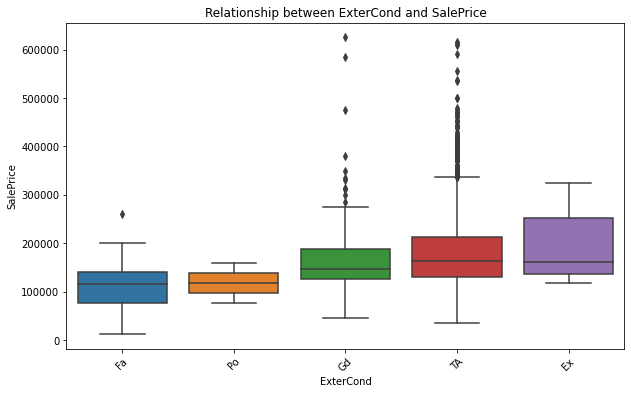

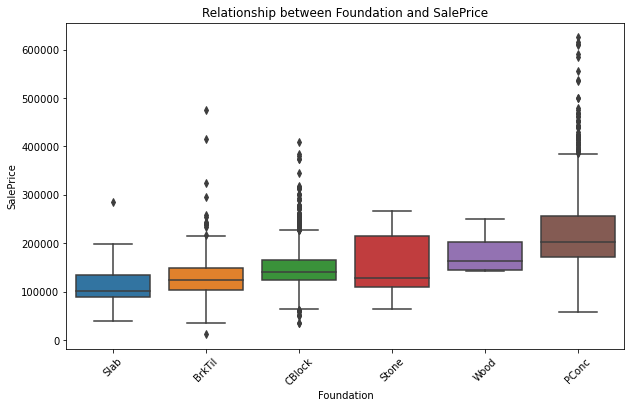

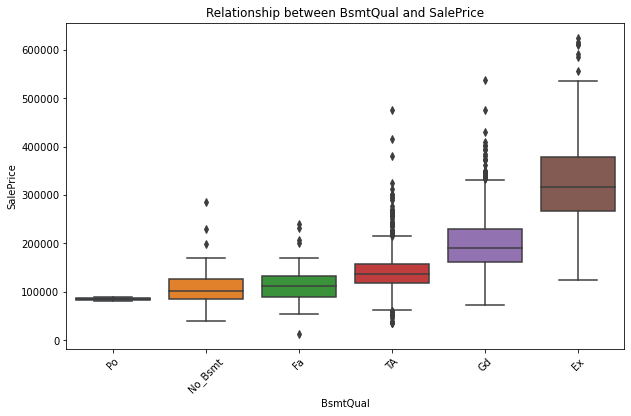

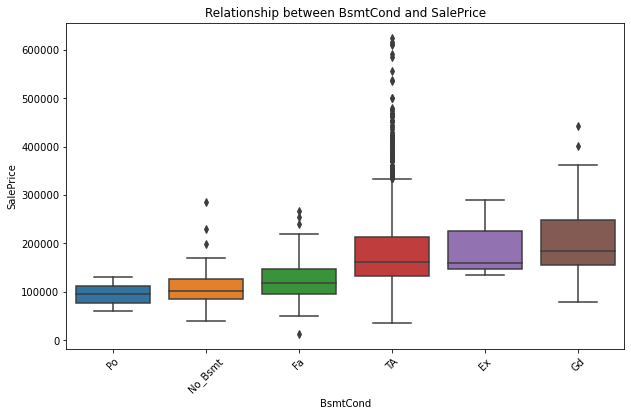

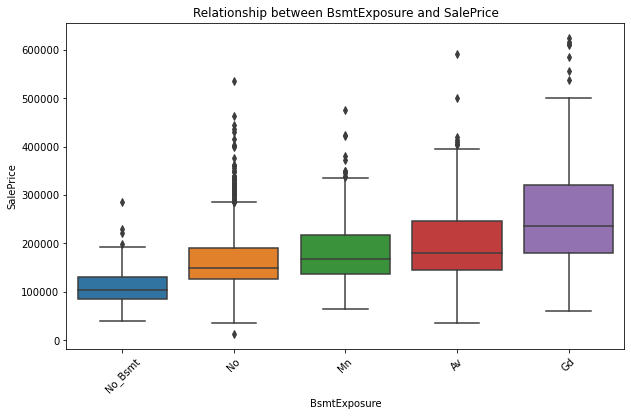

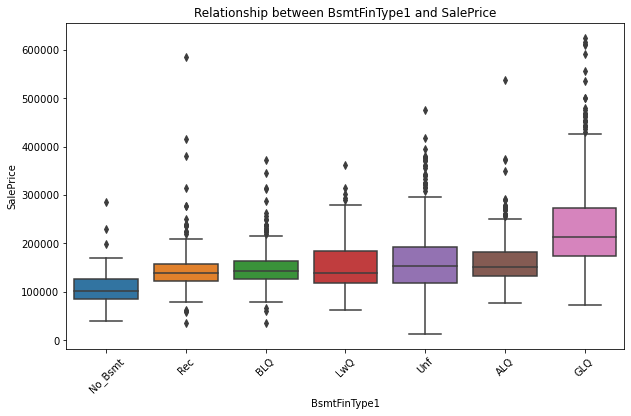

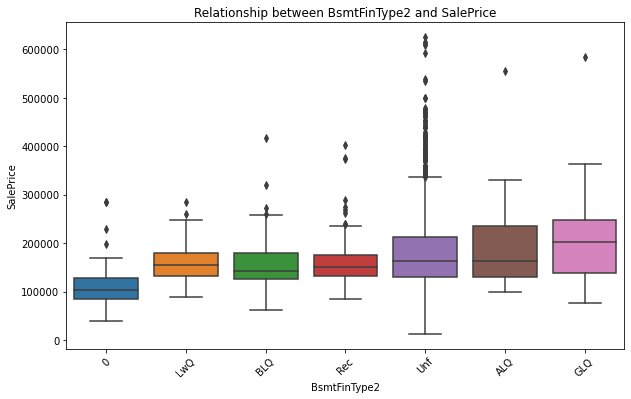

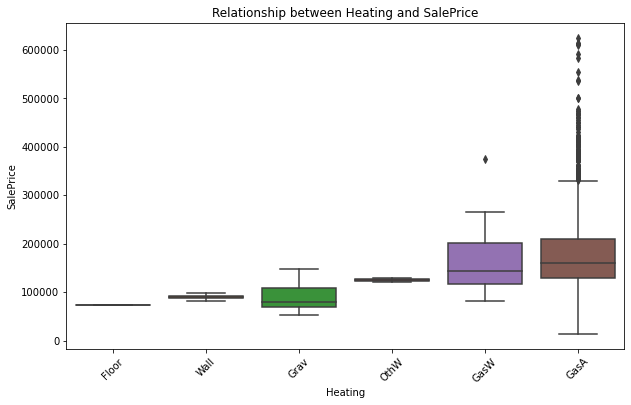

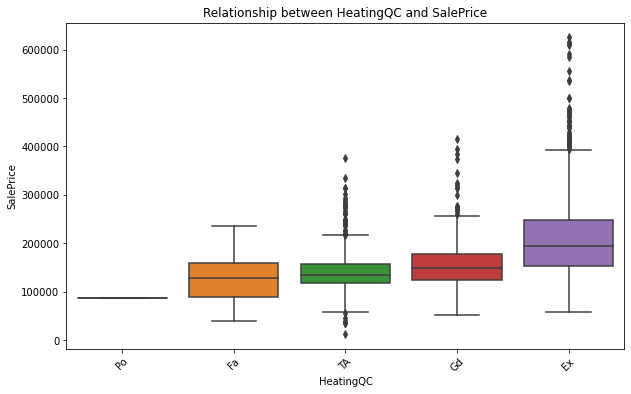

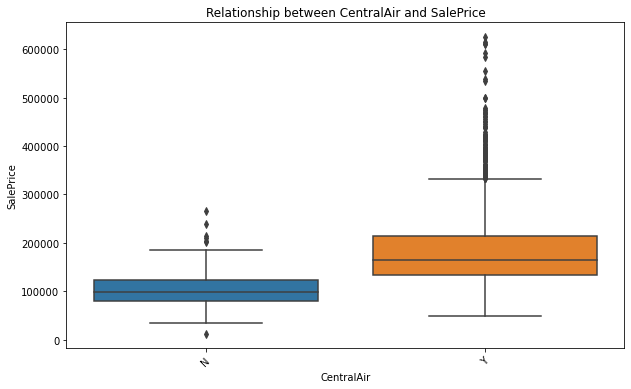

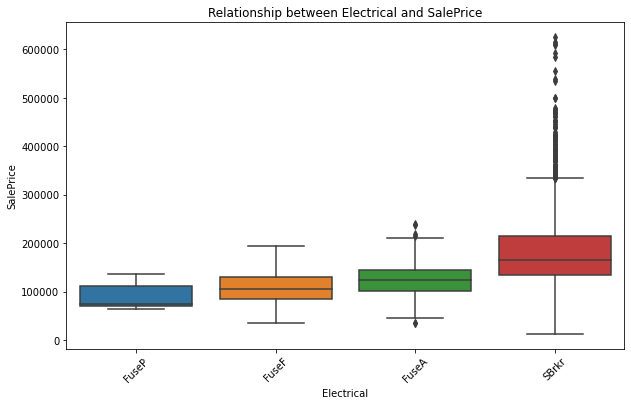

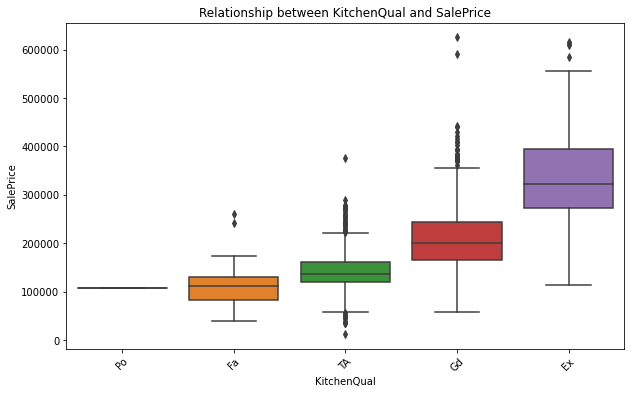

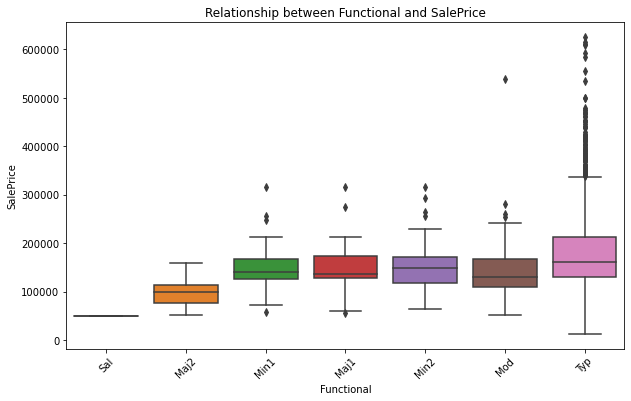

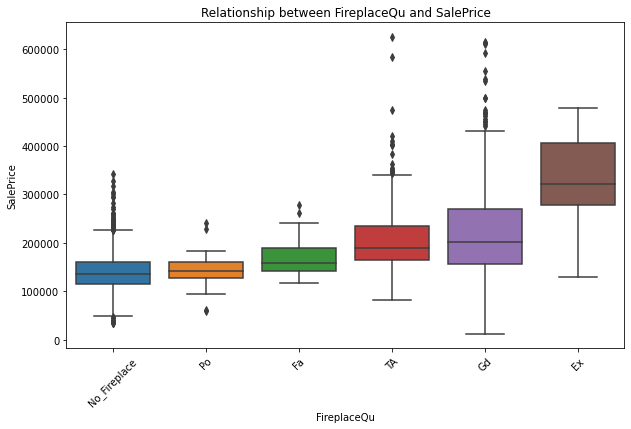

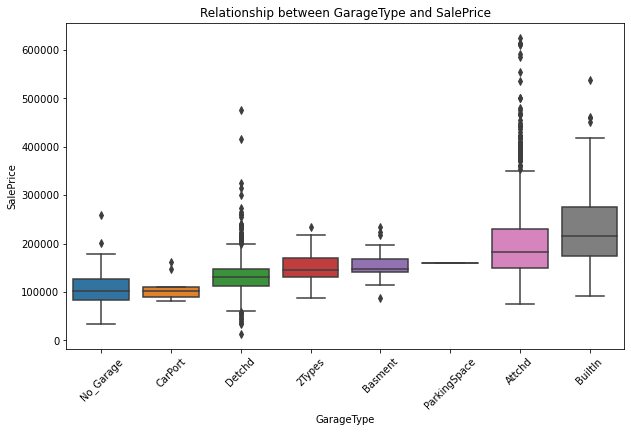

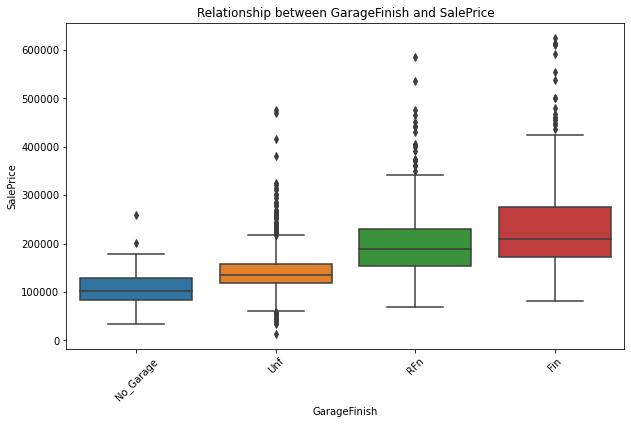

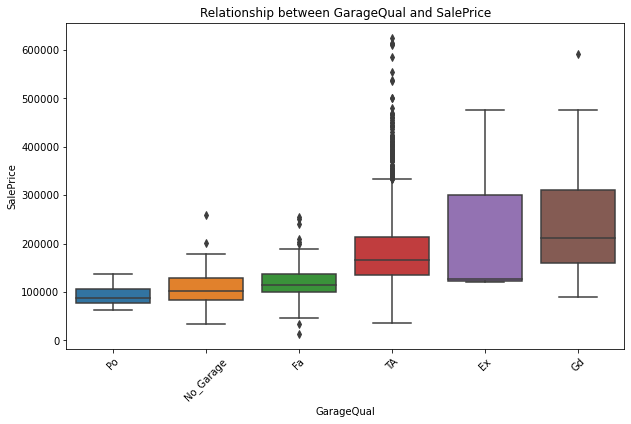

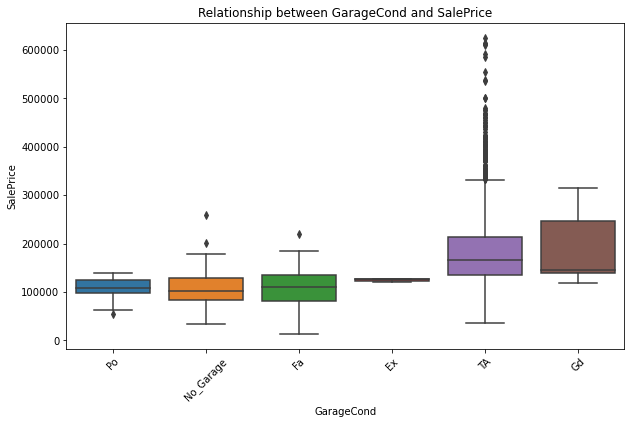

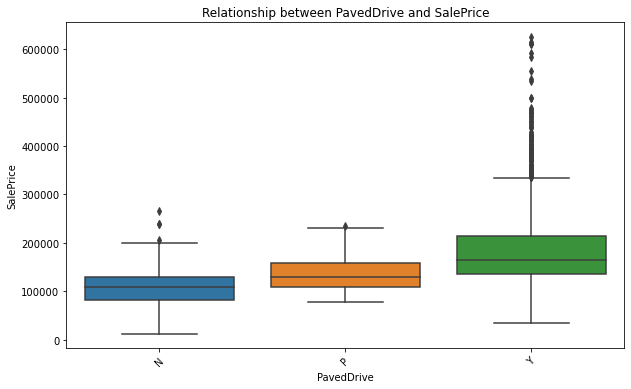

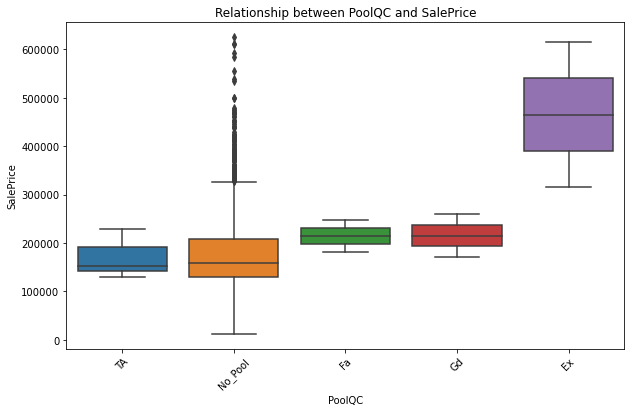

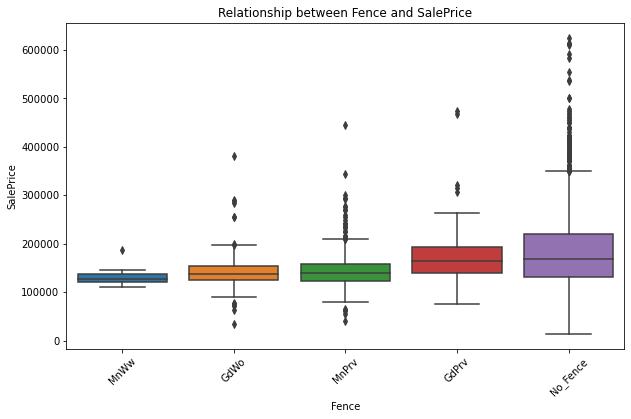

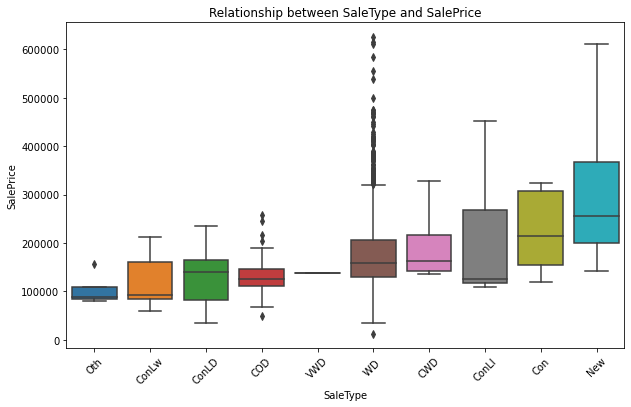

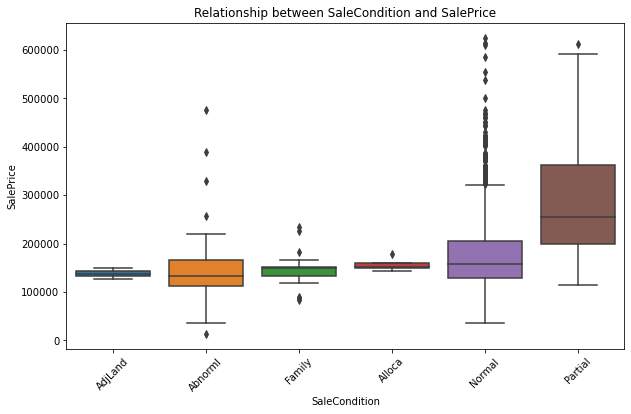

<IPython.core.display.Javascript object>

In [117]:
# boxplot for categorical features
# categories with that show little overlap and could be a strong predictor of the sale price:
# MSZoning(maybe), Neighborhood, RoofMat1(maybe), MasVnrType(maybe), ExterQual, CentralAir(maybe), 
# KitchenQual(maybe), SaleType(maybe,), 


categorical_cols = housing_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Calculate the mean of the SalePrice for each category
    mean_saleprice = housing_cleaned.groupby(col)['SalePrice'].mean().sort_values()

    # Reorder the dataframe based on the sorted mean_saleprice
    sorted_categories = mean_saleprice.index.tolist()
    housing_cleaned[col] = pd.Categorical(housing_cleaned[col], categories=sorted_categories, ordered=True)

    sns.boxplot(x=col, y='SalePrice', data=housing_cleaned)
    plt.xticks(rotation=45)
    plt.title('Relationship between {} and SalePrice'.format(col))
    plt.show()


In [118]:
# Adding two more features to take into account the time since house was built or remodeled
# in relation to the year it was sold.
housing_cleaned["Age"] = housing_cleaned["YrSold"] - housing_cleaned["YearBuilt"]
housing_cleaned["RemodAge"] = (
    housing_cleaned["YrSold"] - housing_cleaned["YearRemodAdd"]
)


# Creating a binary feature if the house was remodeled
housing_cleaned["Remodeled"] = (
    housing_cleaned["YearBuilt"] != housing_cleaned["YearRemodAdd"]
).astype(int)

# Since GrLivArea is only living area above grade it doesnt include the living area
# in the basement so I will create a feature that has the total SF
housing_cleaned["TotalSF"] = (
    housing_cleaned["GrLivArea"] + housing_cleaned["TotalBsmtSF"]
)

<IPython.core.display.Javascript object>

In [119]:
housing_cleaned


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,Remodeled,TotalSF
0,909176150,856,126000,30,RL,68.516053,7890,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,No_Pool,No_Fence,3,2010,WD,Normal,71,60,1,1712.0
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,No_Pool,No_Fence,2,2009,WD,Normal,25,25,0,2098.0
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,No_Pool,No_Fence,11,2007,WD,Normal,77,0,1,1838.0
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0.0,0.0,1,0,2,1,TA,6,Typ,0,No_Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,No_Pool,No_Fence,5,2009,WD,Normal,109,6,1,1444.0
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,1.0,0.0,2,1,3,1,Gd,6,Typ,0,No_Fireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,No_Pool,No_Fence,11,2009,WD,Normal,8,8,0,2475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,952,121000,30,RL,68.516053,8854,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,No_Pool,No_Fence,5,2009,WD,Normal,93,59,1,1904.0
2575,905402060,1733,139600,20,RL,68.516053,13680,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,0,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,No_Pool,No_Fence,6,2009,WD,Normal,54,54,0,1733.0
2576,909275030,2002,145000,90,RH,82.000000,6270,Pave,No_Alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,T

<IPython.core.display.Javascript object>

In [120]:
# Combining all columns that contain square footage of outdoor space

outdoor_columns = ['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'WoodDeckSF']

housing_cleaned['OutdoorSF'] = housing_cleaned[outdoor_columns].sum(axis=1)

# deleting the 3SsnPorch column because it is highly imbalanced and doesnt have a correlation with Saleprice
housing_cleaned = housing_cleaned.drop('3SsnPorch', axis=1)


<IPython.core.display.Javascript object>

In [121]:
# combining the half bath and full bath to create total number of bathrooms feature
bath_columns = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
bath_weights = [1, 0.5, 1, 0.5]
housing_cleaned['TotalBath'] = (housing_cleaned[bath_columns] * bath_weights).sum(axis=1)


<IPython.core.display.Javascript object>

In [122]:
# MSSubClass is a  category feature however it is currently repesented by integers so i will create a new column
# with the numbers converted to a category.  I kept the old MSSubClass.
# create a dictionary to map integer codes to string labels
subclass_dict = {
    20: "subclass20",
    30: "subclass30",
    40: "subclass40",
    45: "subclass45",
    50: "subclass50",
    60: "subclass60",
    70: "subclass70",
    75: "subclass75",
    80: "subclass80",
    85: "subclass85",
    90: "subclass90",
    120: "subclass120",
    150: "subclass150",
    160: "subclass160",
    180: "subclass180",
    190: "subclass190"
}

# convert the MSSubClass variable to a categorical feature with string labels
housing_cleaned["MSSubClass_cat"] = housing_cleaned["MSSubClass"].replace(subclass_dict).astype("category")

# dropping MSSubclass
housing_cleaned = housing_cleaned.drop(columns=["MSSubClass"])


<IPython.core.display.Javascript object>

In [124]:
# Moving sale price to the first column after PID
housing_cleaned.insert(1, "SalePrice", housing_cleaned.pop("SalePrice"))


<IPython.core.display.Javascript object>

In [128]:
housing_cleaned

,PID,SalePrice,GrLivArea,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,Remodeled,TotalSF,OutdoorSF,TotalBath,MSSubClass_cat
0,909176150,126000,856,RL,68.516053,7890,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,166,No_Pool,No_Fence,3,2010,WD,Normal,71,60,1,1712.0,166,2.0,subclass30
1,905476230,139500,1049,RL,42.000000,4235,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,No_Pool,No_Fence,2,2009,WD,Normal,25,25,0,2098.0,105,3.0,subclass120
2,911128020,124900,1001,C (all),60.000000,6060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,0,No_Pool,No_Fence,11,2007,WD,Normal,77,0,1,1838.0,282,1.0,subclass30
3,535377150,114000,1039,RL,80.000000,8146,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0.0,0.0,1,0,2,1,TA,6,Typ,0,No_Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,111,No_Pool,No_Fence,5,2009,WD,Normal,109,6,1,1444.0,279,1.0,subclass70
4,534177230,227000,1665,RL,70.000000,8400,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,1.0,0.0,2,1,3,1,Gd,6,Typ,0,No_Fireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,No_Pool,No_Fence,11,2009,WD,Normal,8,8,0,2475.0,45,3.5,subclass60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,121000,952,RL,68.516053,8854,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,40,No_Pool,No_Fence,5,2009,WD,Normal,93,59,1,1904.0,138,1.0,subclass30
2575,905402060,139600,1733,RL,68.516053,13680,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,0,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,No_Pool,No_Fence,6,2009,WD,Normal,54,54,0,1733.0,0,2.0,subclass20
2576,909275030,145000,2002,RH,82.000000,6270,Pave,No_Alley,Reg,HL

<IPython.core.display.Javascript object>

In [ ]:
THE BELOW SHOULD BE DELETED OR MOVED TO HOUSE LOCATIONS NOTEBOOK

In [ ]:
# save the updated dataframe as a CSV file
locations.to_csv('data/locations.csv', index=False)


In [66]:
# i was getting duplicates when i reloaded, dropped duplicates and saved the file. I forced the 
# encoding which solved the problem.

# read the CSV file with UTF-8 encoding
locations = pd.read_csv('data/locations.csv', encoding='utf-8')

# drop duplicates based on the PID column
locations.drop_duplicates(subset='PID', inplace=True)

# save the updated dataframe as a CSV file with UTF-8 encoding
locations.to_csv('data/locations.csv', index=False, encoding='utf-8')

# reload the CSV file with UTF-8 encoding
locations = pd.read_csv('data/locations.csv', encoding='utf-8')


<IPython.core.display.Javascript object>

In [71]:
# select the PID column from the housing_cleaned dataframe
housing_pid = housing_cleaned['PID']

# select the PID column from the locations dataframe
locations_pid = locations['PID']

# check which PID values are present in the housing_cleaned dataframe but not in the locations dataframe
missing_from_locations = housing_pid[~housing_pid.isin(locations_pid)]

# check which PID values are present in the locations dataframe but not in the housing_cleaned dataframe
missing_from_housing = locations_pid[~locations_pid.isin(housing_pid)]


<IPython.core.display.Javascript object>

In [82]:
# create a list of the PID values
pid_list = [531477050, 916253320, 535300120, 902205010, 902477120, 909129100, 
            916252170, 535426150, 904101170, 902401130, 916477060, 911175360, 
            902103150, 916403040, 902401120, 923125030, 908154040, 912251110, 
            905450020, 902205020]

# create boolean masks indicating whether each PID value is present in the MapRefNo and GeoRefNo columns
missing_from_locations_maprefno = real_estate['MapRefNo'].isin(pid_list)
missing_from_locations_georefno = real_estate['GeoRefNo'].isin(pid_list)

# count the number of rows in real_estate where each boolean mask is True
count_maprefno = missing_from_locations_maprefno.sum()
count_georefno = missing_from_locations_georefno.sum()

# print the results
print(f"{count_maprefno} rows in real_estate have a MapRefNo value in pid_list")
print(f"{count_georefno} rows in real_estate have a GeoRefNo value in pid_list")


0 rows in real_estate have a MapRefNo value in pid_list
0 rows in real_estate have a GeoRefNo value in pid_list


<IPython.core.display.Javascript object>

In [74]:
real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv")

/var/folders/2g/w2gh47jx2d536k1lqy8yjms40000gn/T/ipykernel_17974/4261627594.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv")


<IPython.core.display.Javascript object>

In [78]:
# select the rows in real_estate where the MapRefNo column is in the missing_from_locations list
missing_from_locations_real_estate = real_estate[
    real_estate["GeoRefNo"].isin(missing_from_locations)
]
missing_from_locations_real_estate

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs


<IPython.core.display.Javascript object>

In [83]:
# creating a boolean mask indicating whether each PID value is present in the PID column of housing_cleaned
pid_in_housing_cleaned = housing_cleaned['PID'].isin(pid_list)

# selecting the rows in housing_cleaned where the PID column matches one of the values in pid_list
housing_cleaned_with_pid = housing_cleaned[pid_in_housing_cleaned]


<IPython.core.display.Javascript object>

In [84]:
housing_cleaned_with_pid

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSSubClass_cat
79,531477050,1012,67500,30,RH,70.0,9800,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,TA,N,FuseA,1012,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Fireplace,Detchd,1920.0,Unf,1.0,429.0,TA,TA,Y,121,0,80,0,No_Pool,No_Fence,4,2010,WD,Normal,90,60,1828.0,1,80,1.0,subclass30
109,916253320,1502,330000,120,RM,0.0,9763,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,No_Pool,No_Fence,9,2007,WD,Normal,9,9,3004.0,0,0,2.5,subclass120
404,535300120,1382,176000,80,RL,120.0,19296,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,6,5,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,399.0,TA,TA,CBlock,TA,TA,Gd,Rec,672.0,ALQ,690.0,0.0,1362.0,GasA,TA,Y,SBrkr,1382,0,1.0,0.0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1991.0,Unf,2.0,884.0,TA,TA,Y,0,0,252,0,No_Pool,GdWo,5,2009,WD,Normal,47,47,2744.0,0,252,2.0,subclass80
495,902205010,612,45000,30,RM,50.0,5925,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,No_Bsmt,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0.0,0.0,1,0,1,1,TA,4,Typ,0,No_Fireplace,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,No_Pool,No_Fence,10,2009,WD,Normal,69,59,612.0,1,25,1.0,subclass30
558,902477120,720,34900,30,C (all),60.0,7879,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,N,0,523,115,0,No_Pool,GdWo,11,2009,WD,Abnorml,89,59,1440.0,1,638,1.0,subclass30
680,909129100,1520,159434,50,RH,55.0,4500,Pave,Pave,IR2,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1932,2000,Gable,CompShg,VinylSd,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,182.0,Unf,0.0,611.0,793.0,GasA,Ex,Y,SBrkr,848,672,0.0,0.0,1,0,3,1,TA,6,Typ,0,No_Fireplace,Detchd,1968.0,Unf,1.0,281.0,TA,TA,Y,0,0,56,0,No_Pool,No_Fence,7,2009,WD,Abnorml,77,9,2313.0,1,56,1.0,subclass50
683,916252170,1295,230000,120,RM,0.0,8239,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,No_Bsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,No_Pool,No_Fence,11,2006,WD,Normal,20,20,1295.0,0,0,2.0,subclass120
895,535426150,1142,113500,20,RL,80.0,9000,Pave,No_Alley,IR1,HLS,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Flat,Tar&Grv,Wd Sdng,Wd Sdng,BrkFace,82.0,TA,TA,CBlock,Gd,TA,Gd,Unf,0.0,Unf,0.0,160.0,160.0,GasA,Fa,Y,SBrkr,1142,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Basment,1958.0,RFn,1.0,384.0,TA,TA,Y,0,28,64,0,No_Pool,No_Fence,4,2009,WD,N

<IPython.core.display.Javascript object>